In [253]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/'
                 'IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [254]:
# Check class distribution.
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

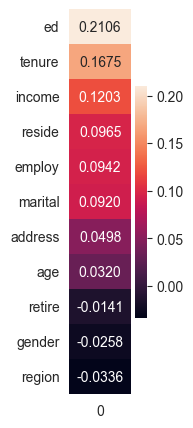

In [255]:
# Split independent variables from target
X = df.drop("custcat", axis=1)
y = df["custcat"]

# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the correlation as a heatmap
plt.figure(figsize=(1, 5))
correlation_to_label = X_train.corrwith(y_train).sort_values(ascending=False)
sns.heatmap(pd.DataFrame(correlation_to_label), fmt='.4f', annot=True)
plt.show()

In [256]:
# Build a pipeline for our k-NN model.
pipeline_knn = Pipeline([
    ('select', SelectKBest(score_func=f_classif, k='all')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier()),
])

In [ ]:
# Define the parameters we want grid search to try.
param_grid = {
    'select__k': [number for number in range(1, len(X_train.columns) + 1)],
    'knn__n_neighbors': [n for n in range(1, 20)],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Define our cross validation method. Since we are doing classification we can use stratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Apply gridsearchCV and train our model with the best parameters.
gridsearch = GridSearchCV(pipeline_knn, param_grid=param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
gridsearch.fit(X_train, y_train)

In [258]:
print("Best parameters:", gridsearch.best_params_)
print("Best CV f1_macro:", gridsearch.best_score_)

Best parameters: {'knn__n_neighbors': 19, 'knn__p': 2, 'knn__weights': 'uniform', 'select__k': 3}
Best CV f1_macro: 0.3898807514682721


In [259]:
# Use our model now trained with the best parameters to evaluate our test set using f1_macro.
y_pred = gridsearch.best_estimator_.predict(X_test)
print("Test f1_macro:", f1_score(y_test, y_pred, average='macro'))

Test f1_macro: 0.3422351945079218
